# **Projeto Big Data - 2s2024**
## **Desenvolvido por:**
- Cesar Ezra Ades
- Jonathan Sutton
- Uri Muszkat


### Introdução
Este conjunto de dados do Estado de Connecticut contém registros de vendas de imóveis ocorridas entre 2001 e 2022, com valores iguais ou superiores a $2.000. Os dados incluem informações sobre a cidade, endereço, data da venda, tipo de propriedade (residencial, apartamento, comercial, industrial ou terreno vazio), preço de venda e avaliação do imóvel. As vendas são relatadas para o ano fiscal de outubro a setembro de cada ano, em conformidade com as leis estaduais de Connecticut, sendo uma fonte importante para análises de mercado e estatísticas de transações imobiliárias na região.

### Objetivo
O objetivo do projeto é realizar uma análise exploratória dos dados disponíveis. A análise buscará identificar padrões de preços, variações sazonais e tendências de mercado por tipo de propriedade e localização, oferecendo insights para o setor imobiliário e planejadores urbanos.

In [0]:
#Abrindo a base de dados

import pyspark.sql.functions as func

url = "s3://bigdata-rais/projeto/jonathans/real_estate_sales_2001_2022_gl.csv"

df = spark.read.csv(url,header=True)
df.limit(2).display()




Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.00,232000.00,0.5992,Residential,Single Family,null,null,null,POINT (-72.343628962 41.728431984)
2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.463,Commercial,null,null,null,null,null


In [0]:
df.columns

['Serial Number',
 'List Year',
 'Date Recorded',
 'Town',
 'Address',
 'Assessed Value',
 'Sale Amount',
 'Sales Ratio',
 'Property Type',
 'Residential Type',
 'Non Use Code',
 'Assessor Remarks',
 'OPM remarks',
 'Location']

In [0]:
from pyspark.sql import functions as F

# Supondo que o DataFrame df já esteja carregado com os dados
property_type_summary = df.groupBy("Property Type").agg(
    F.count("Sale Amount").alias("Contagem"),
    F.mean("Sale Amount").alias("Media_Sale_Amount")
).orderBy("Contagem", ascending=False)

# Exibir o resumo
property_type_summary.show(truncate=False)



+--------------+--------+------------------+
|Property Type |Contagem|Media_Sale_Amount |
+--------------+--------+------------------+
|Single Family |401612  |388514.26217217126|
|NULL          |382446  |413434.22798455204|
|Residential   |151064  |470740.5250717578 |
|Condo         |105419  |260210.1488305713 |
|Two Family    |26408   |199044.60727090275|
|Three Family  |12586   |179844.5162084856 |
|Vacant Land   |7824    |417032.7176342025 |
|Commercial    |5987    |1677886.2614080505|
|Four Family   |2150    |314291.0358139535 |
|Apartments    |1327    |6712885.9412207985|
|Industrial    |795     |2238044.5635220124|
|Public Utility|10      |213604.4          |
+--------------+--------+------------------+



In [0]:
import matplotlib.pyplot as plt

# Coletar dados para as colunas "Assessed Value" e "Sale Amount"
data = df.select("Assessed Value", "Sale Amount").dropna().toPandas()

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data["Assessed Value"], data["Sale Amount"], alpha=0.5, s=10)  # 'alpha' controla a transparência e 's' o tamanho dos pontos
plt.title("Relação entre Assessed Value e Sale Amount")
plt.xlabel("Assessed Value")
plt.ylabel("Sale Amount")
plt.show()

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can


Como é possível ver na tabela acima, o tipo de propriedade mais negociada no período foi as do tipo 'Single Family', com 401.612 imóveis negociados. Ao mesmo tempo, podemos observar que os imóveis com a maior média de preço de venda foram imóveis Residenciais, com uma média de U$470.740,52 por imóvel.


### Gráficos

- Histograma de "Sale Amount": Distribuição dos valores de venda para entender a frequência de diferentes faixas de preços.
- Boxplot de "Sale Amount" por "Property Type": Comparação dos valores de venda por tipo de propriedade (residencial, comercial, etc.), identificando possíveis outliers.
Gráfico de Barras de "Residential Type":
- Frequência de tipos residenciais (casas, apartamentos) para observar quais são mais comuns.
- Gráfico de Dispersão de "Assessed Value" vs "Sale Amount": Relação entre o valor avaliado e o valor de venda para verificar tendências ou discrepâncias na avaliação.
- Evolução Temporal do "Sale Amount" por Ano ("List Year"): Linha do tempo mostrando a média dos valores de venda por ano, evidenciando tendências de mercado ao longo do tempo.
- Mapa de Calor por Localização: Mapa geoespacial mostrando a localização das transações, destacando regiões com mais vendas ou com valores mais altos.

### Tabelas
- Tabela Resumo por Cidade ("Town"): Estatísticas como média, mediana e desvio padrão de "Sale Amount" e "Assessed Value" por cidade.
- Tabela de Variação do "Sales Ratio" por "Property Type": Média e desvio padrão do índice de vendas por tipo de propriedade, analisando a consistência entre valor avaliado e valor de venda.
- Contagem de Transações por Ano ("List Year"): Quantidade de transações por ano, para observar picos e quedas na atividade de vendas.
- Tabela de Outliers: Listagem de vendas com discrepâncias significativas entre "Assessed Value" e "Sale Amount", sugerindo outliers ou propriedades sub ou superavaliadas.

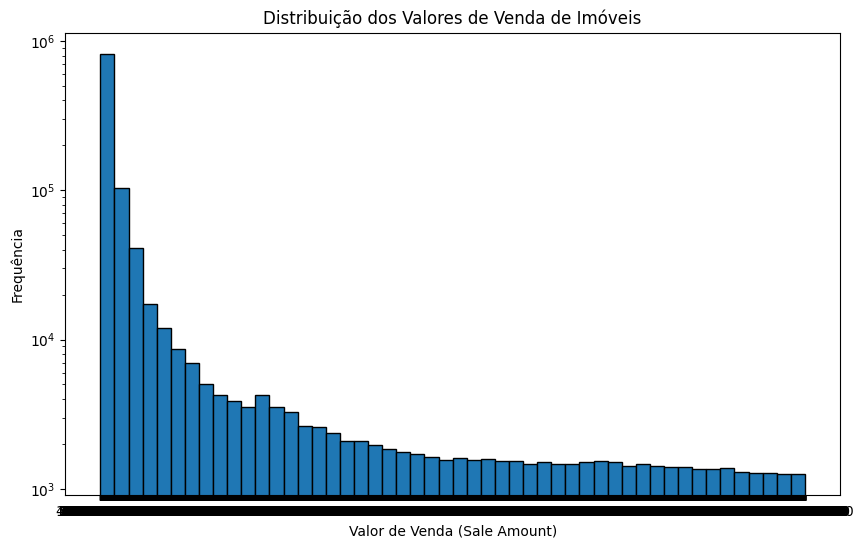

In [0]:
import matplotlib.pyplot as plt

sale_amounts = df.select("Sale Amount").dropna().rdd.flatMap(lambda x: x).collect()

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(sale_amounts, bins=50, edgecolor='k',log=True)
plt.title("Distribuição dos Valores de Venda de Imóveis")
plt.xlabel("Valor de Venda (Sale Amount)")
plt.ylabel("Frequência")
plt.show()

In [0]:
from pyspark.sql import functions as F


tabela_resumo = df.groupBy("Town").agg(
    F.mean("Sale Amount").alias("Media_Sale_Amount"),
    F.expr("percentile_approx(`Sale Amount`, 0.5)").alias("Mediana_Sale_Amount"),
    F.stddev("Sale Amount").alias("Desvio_Sale_Amount"),
    F.mean("Assessed Value").alias("Media_Assessed_Value"),
    F.expr("percentile_approx(`Assessed Value`, 0.5)").alias("Mediana_Assessed_Value"),
    F.stddev("Assessed Value").alias("Desvio_Assessed_Value")
)

# Exibir a tabela
tabela_resumo.show(truncate=False)

+-------------+------------------+-------------------+------------------+--------------------+----------------------+---------------------+
|Town         |Media_Sale_Amount |Mediana_Sale_Amount|Desvio_Sale_Amount|Media_Assessed_Value|Mediana_Assessed_Value|Desvio_Assessed_Value|
+-------------+------------------+-------------------+------------------+--------------------+----------------------+---------------------+
|Middlefield  |264336.7550200803 |236000.0           |176880.95957394878|158257.09718875503  |142900.0              |88099.94766389151    |
|Bethlehem    |309591.0454985479 |270000.0           |260999.02474599282|182793.16553727008  |170600.0              |117849.5936249037    |
|Plainfield   |208060.67745779542|165000.0           |599547.1077161247 |123856.98232373386  |95940.0               |343635.9489747304    |
|Litchfield   |384365.73844641104|280000.0           |500052.8603423957 |220744.6430678466   |166610.0              |219432.6316919028    |
|Monroe       |40023